In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 32.63 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 344.4MB 37kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17452 sha256=5a5fe523ecf20138600f00ac21ccae638bc362993216d1f93e162f171fefcc39
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [ ]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later!
!pip install efficientnet_pytorch
!pip install tensorboardX

     | 235kB 6.7MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=a674444edd275e43cdf27cd4665b2be6237274828beeb0a37b2bba890a794ff3
  Stored in directory: /tmp/pip-ephem-wheel-cache-_0a3d6b_/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp37-none-any.whl size=16031 sha256=559205a18940b881ee220bd9ba5c497679af79317d7aefbc7b0d8f71a6c6fe60
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |███████████████████

# Let's get some data!

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need.

In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

!curl -L [YOUR-LINK-HERE] > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0   1385      0 --:--:-- --:--:-- --:--:--  1385
100 78.6M  100 78.6M    0     0  50.7M      0  0:00:01  0:00:01 --:--:--  111M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df05bd1f86bab67c8368ae5e4ad.jpg  
 extracting: test/410993714e325a1de3e394ffe860df3a_jpg.rf.519bf0fdbd5e38cd44cae1cfebc98536.jpg  
 extracting: test/4e3117459d759798537eb52cf5bf534d_jpg.rf.5b99421bf416463a8c75cfd07f8a68d1.jpg  
 extracting: test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.a907af85301c729635d6ab1

In [ ]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  README.roboflow.txt  test/   valid/
README.dataset.txt      sample_data/         train/


In [ ]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.fbcc3af401eca6bf01b4d031af33c1fc.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.c759321c26b9bc9c38b31cd49533d350.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.3a714622550c2311f7843cd103a50be3.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.fbdf213f256c973bcb79f186728a898f.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.bca01af1df978ad9092f057443798ad0.jpg
03d3ff4582c8125d69c19a72f846bec8_jpg.rf.c4c2b8da2df7fad6565ec5a1ab9453a2.jpg
040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c.jpg
04aed88a8d23cf27e47806eb23948495_jpg.rf.985c4b231ab28487d4345ab040afb94c.jpg
055b79dd8db4c43e1a23be6095aaf624_jpg.rf.67a8ff4aee8a2f00af03b3f98977c676.jpg
05de676d5078dc0a13796f3f627993ef_jpg.rf.0a8e65da4f29d2a28325d3f020988eaf.jpg
06770ce99d4866165c0dfb104179c361_jpg.rf.d8685d4639672391538d33e57ff87a85.jpg
0798bfb058da59d189c1bfadcf814f29_jpg.rf.4b02423be86fa6dc14a4913de966a5dd.jpg
0b4ba28f0c759a11750a6430649b52e3_jpg.rf.c840c64b42f1edd63fd63024fed5ec8b.jpg

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir Chess
!mkdir Chess/annotations
!mkdir Chess/Annotations
!mkdir Chess/Images

In [ ]:
%cp train/_annotations.coco.json Chess/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg Chess/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Chess";
img_dir = "./";
set_dir = "Images";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  anchors = torch.from_numpy(all_anchors.astype(np.float32))
Monk_Object_Detection/4_efficientdet/lib/src/model.py:282: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this valu

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2561: UserWarning: Exporting aten::index operator with indices of type Byte. Only 1-D indices are supported. In any other case, this will produce an incorrect ONNX graph.
  warnings.warn("Exporting aten::index operator with indices of type Byte. "
/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:653: UserWarning: This model contains a squeeze operation on dimension 1. If the model is intended to be used with dynamic input shapes, please use opset version 11 to export the model.
  "intended to be used with dynamic input shapes, please use opset version 11 to export the model.")



Epoch    64: reducing learning rate of group 0 to 1.0000e-05.



Epoch    81: reducing learning rate of group 0 to 1.0000e-06.



Epoch    92: reducing learning rate of group 0 to 1.0000e-07.



Epoch    96: reducing learning rate of group 0 to 1.0000e-08.



CPU times: user 34min 52s, sys: 9min 23s, total: 44min 15s
Wall time: 1h 7min 20s


# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['pieces',
 'bishop',
 'black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.044s)
CPU times: user 230 ms, sys: 72.3 ms, total: 303 ms
Wall time: 319 ms


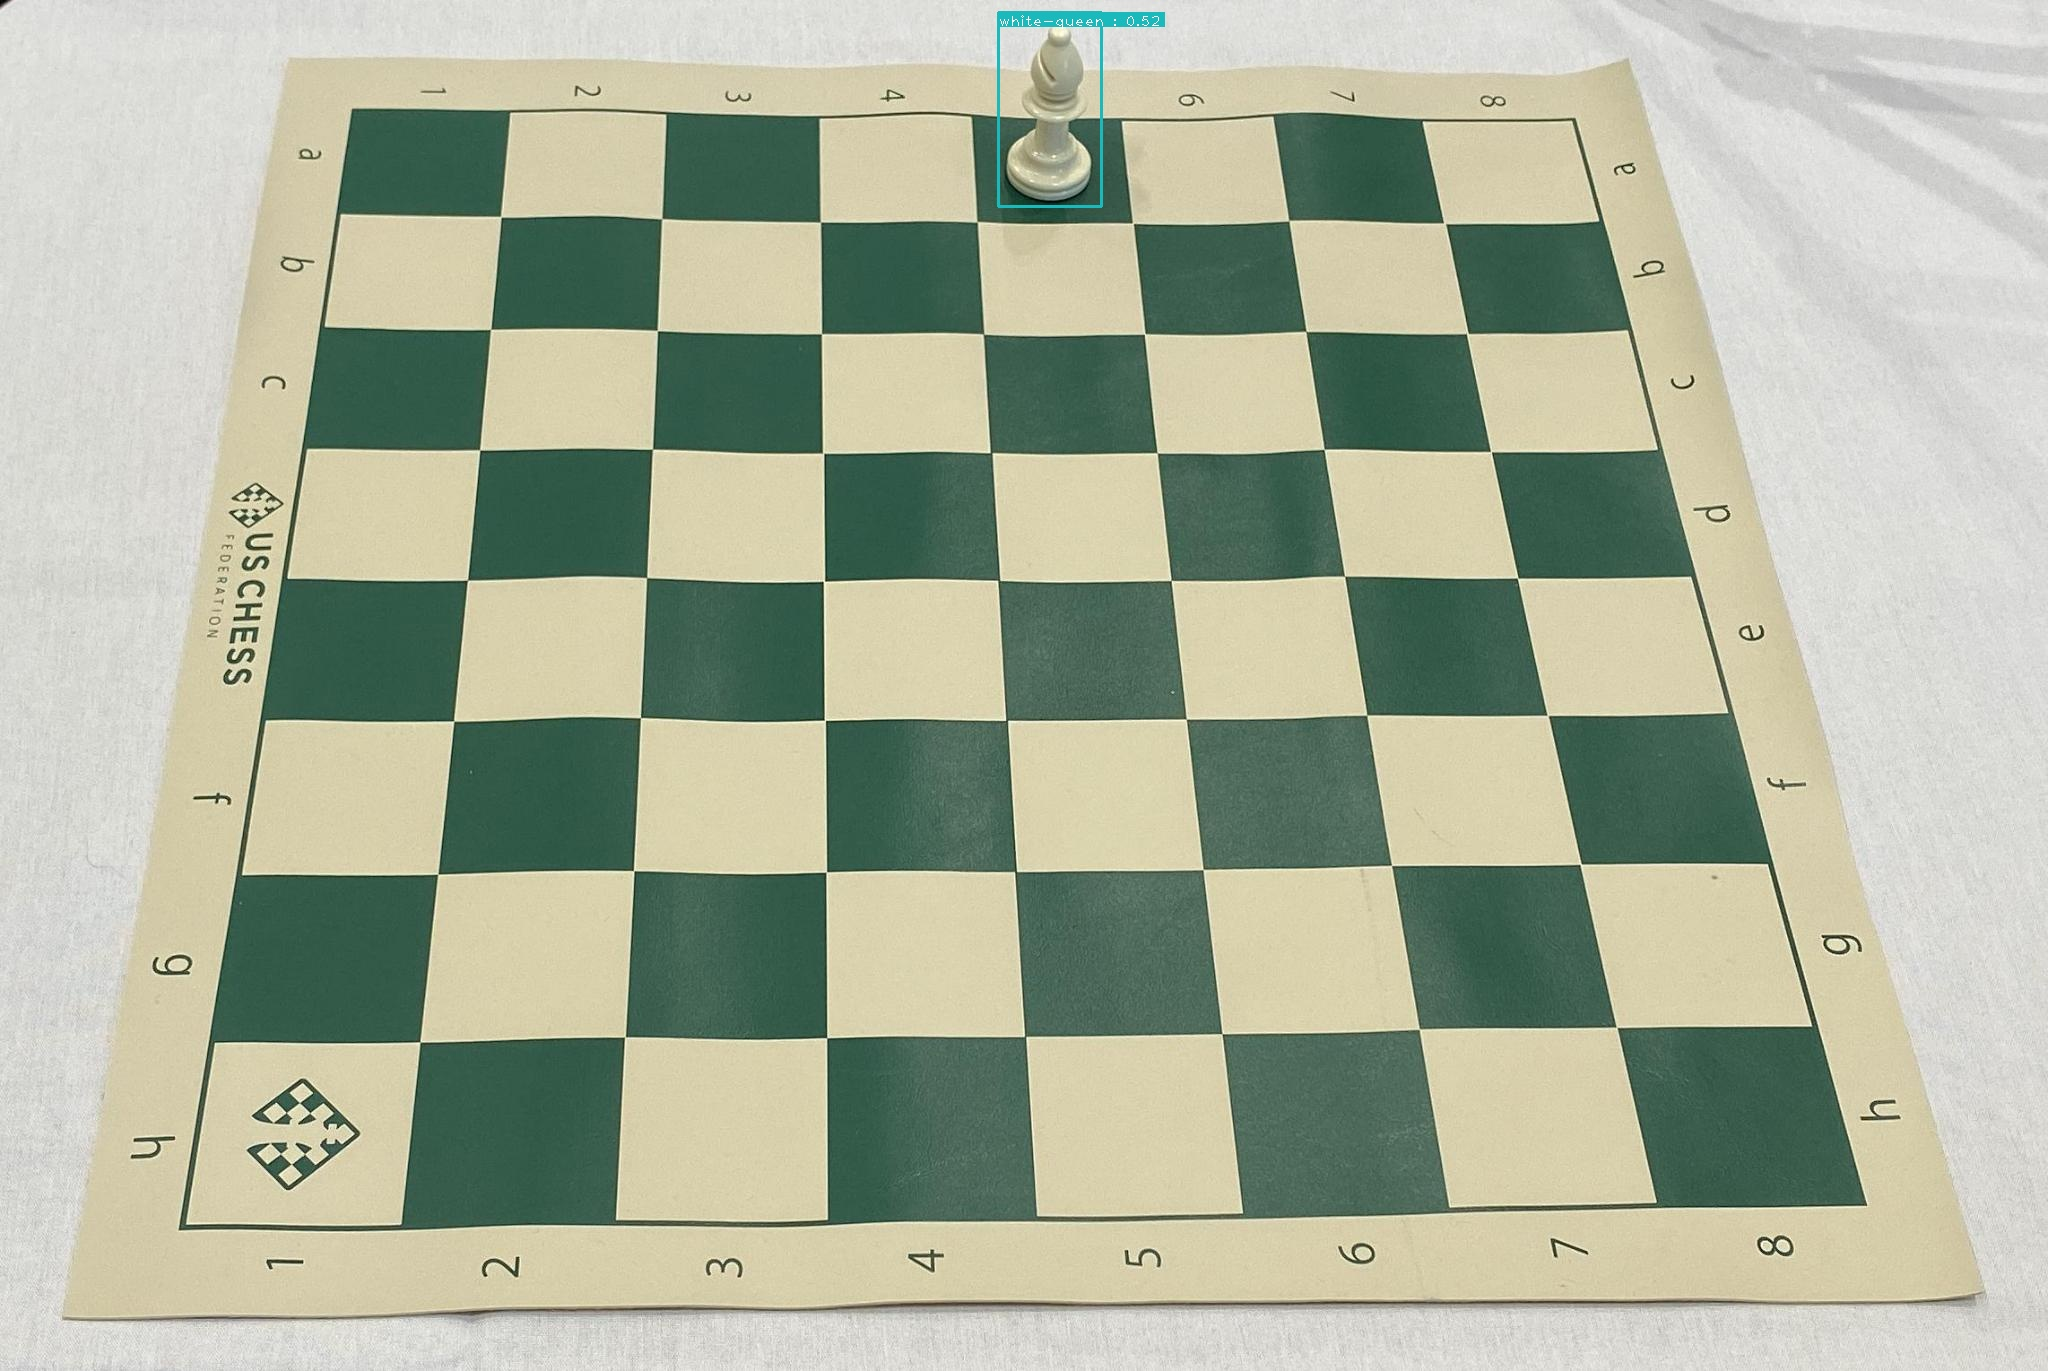

In [ ]:
from IPython.display import Image
Image(filename='output.jpg')

# Export Trained Weights

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later!
!pip install efficientnet_pytorch
!pip install tensorboardX

In [ ]:
#recover trained weights
!mkdir '/trained'
!cp '/content/drive/MyDrive/signatrix_efficientdet_coco_2021-03-22-02:02.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/MyDrive/signatrix_efficientdet_coco_2021-03-22-02:02.pth' '/trained/signatrix_efficientdet_coco.pth'

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [ ]:
#download some test data
!curl -L [YOUR LINK HERE] | jar -x

curl: (3) [globbing] bad range in column 2
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: LINK
curl: (3) [globbing] unmatched close brace/bracket in column 5


In [ ]:
!ls test

0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg
1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg
2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df05bd1f86bab67c8368ae5e4ad.jpg
410993714e325a1de3e394ffe860df3a_jpg.rf.519bf0fdbd5e38cd44cae1cfebc98536.jpg
4e3117459d759798537eb52cf5bf534d_jpg.rf.5b99421bf416463a8c75cfd07f8a68d1.jpg
5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.a907af85301c729635d6ab1c31eb31b2.jpg
654bb8835258b26c466b1c19893df451_jpg.rf.95aad22d4dd31ab256cb2bcff02a34dd.jpg
685b860d412b91f5d4f7f9e643b84452_jpg.rf.5ba8dc0b5d2585d01b28089debd42cd6.jpg
73a38a5c8f8f1b09f093f304660d5326_jpg.rf.2d2fa2f4b419d9f2a57fb82d38d8bc6b.jpg
749e9074a77f8d34d86e2218f26cdab4_jpg.rf.8079f8abd9f24ec16e76fcbf18489f46.jpg
7a34d8620235048917b28bcfd3b5572b_jpg.rf.71653deb6fe88ad472dabea12353373d.jpg
8ff752f9ed443e6e49d495abfceb2032_jpg.rf.c3e91277eea99c26328e39a6f0285189.jpg
a3863d0be6002c21b20ac88817b2c56f_jpg.rf.e421134b139d57e02e7df9468a35c1fb.jpg

In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['pieces',
 'bishop',
 'black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']

In [ ]:
%%time
#bang!
img_path = "/content/test/c4943d83c06a12ad5e0399d19514a4ca_jpg.rf.8b0040b3b68009f6f700ea28fb1aa491.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.044s)
CPU times: user 258 ms, sys: 24.1 ms, total: 283 ms
Wall time: 279 ms


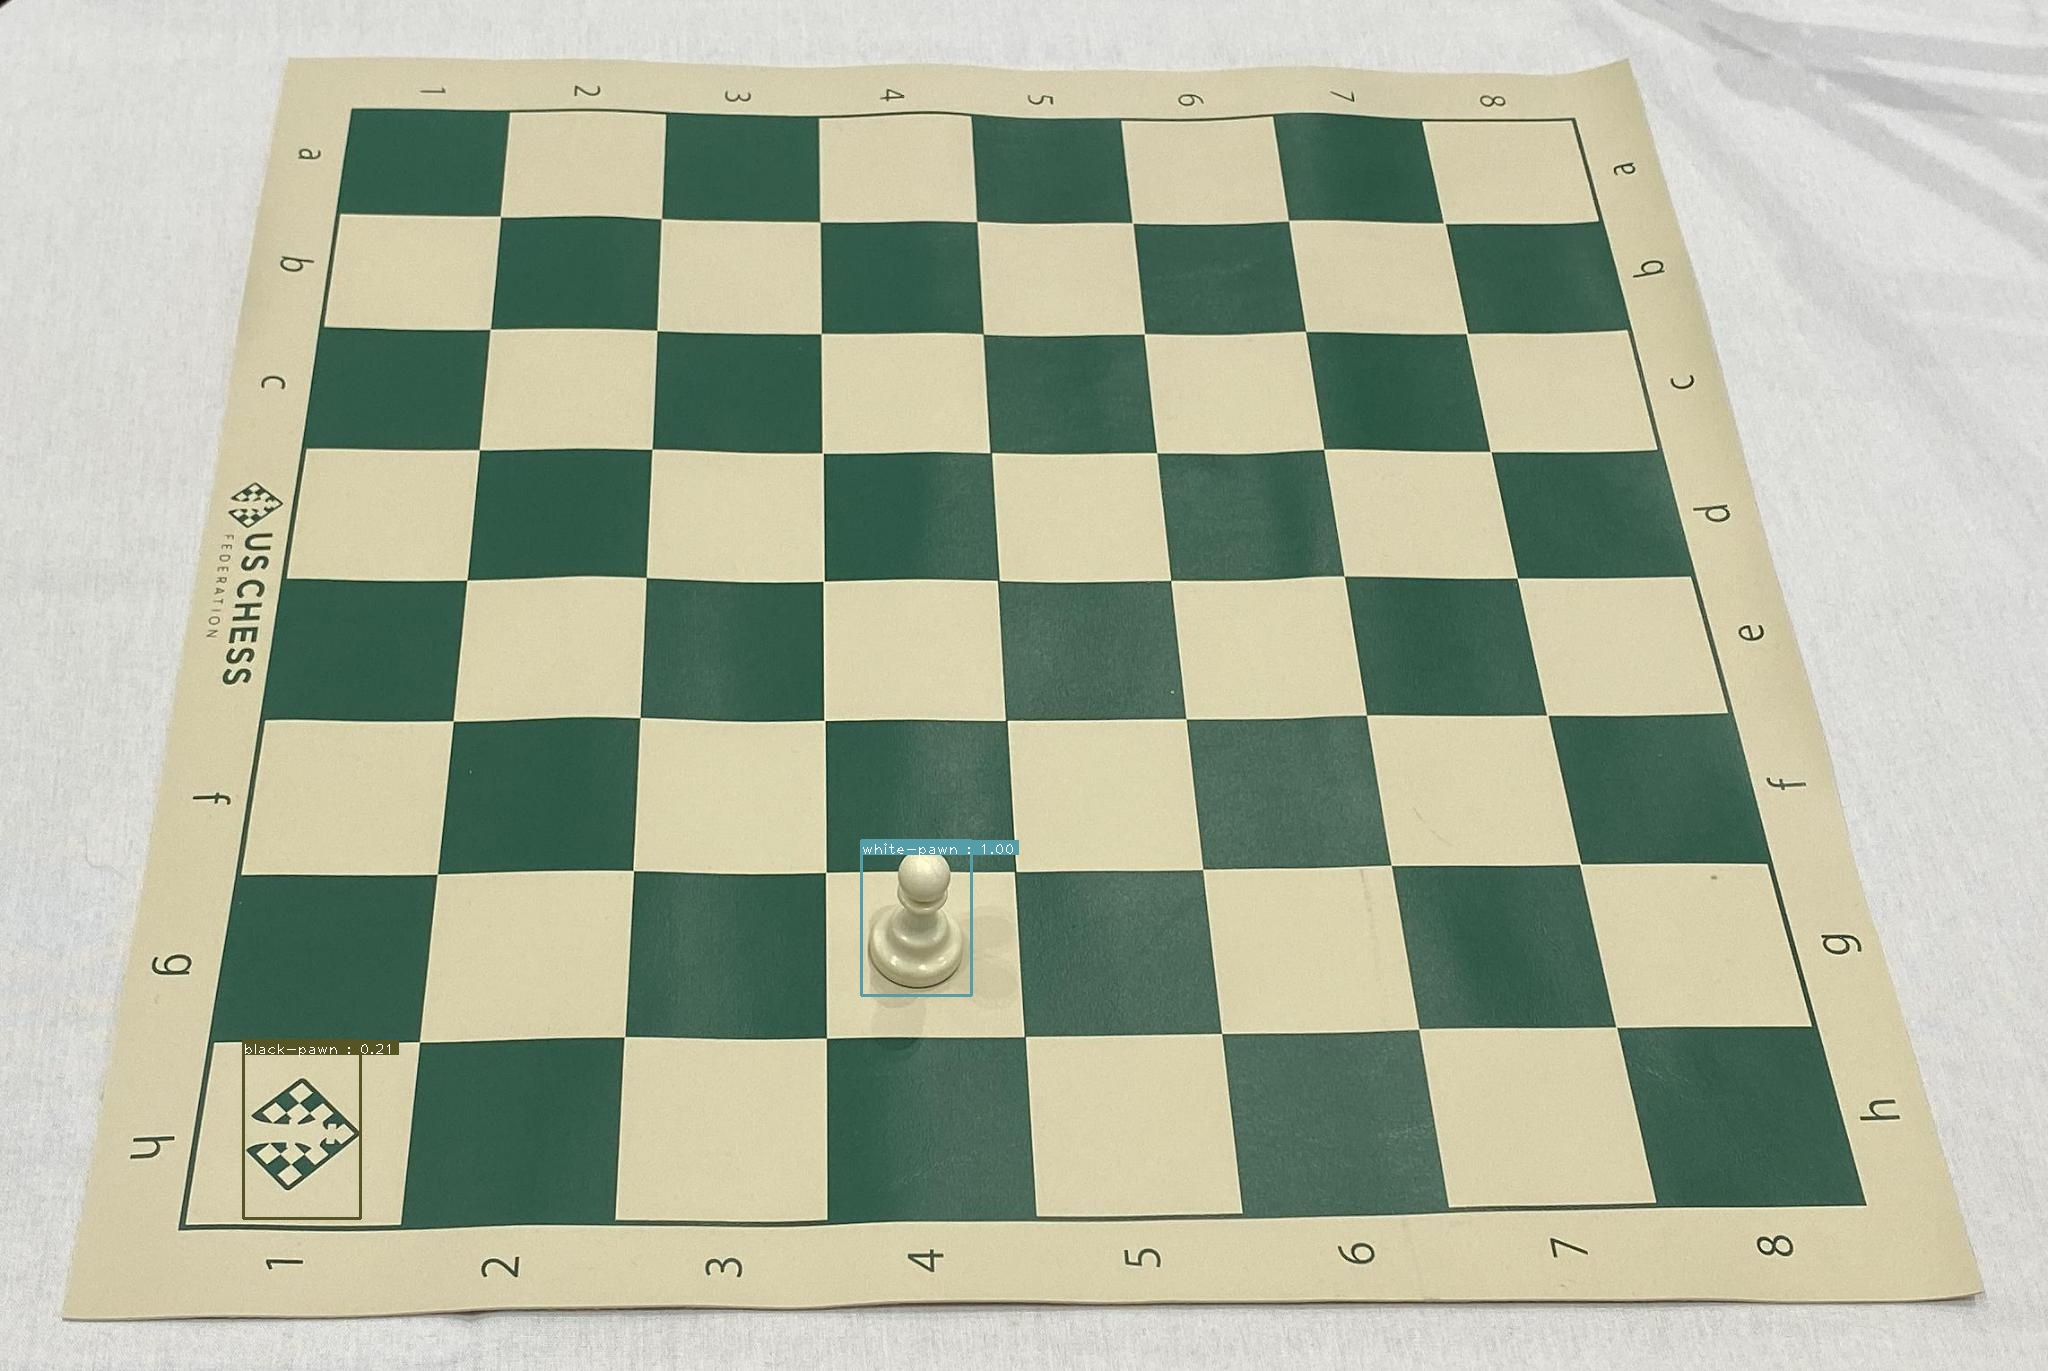

In [ ]:
from IPython.display import Image
Image(filename='output.jpg')